In [1]:
import numpy as np
import sys
import warnings
warnings.filterwarnings('ignore')

# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '../src/data/')
from make_dataset import X_train, y_train, X_test, y_test

sys.path.insert(1, '../src/visualization/')
import visualize as vi

from tensorflow.keras.layers import (Dense,
                                     Dropout,
                                     Flatten,
                                     Conv2D,
                                     MaxPooling2D,
                                     Activation)
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
TRAIN_PATH = '../data/raw/train/'
#VALIDATION_PATH = '../data/raw/kaggle/Face Mask Dataset/Validation/'
TEST_PATH = '../data/raw/test/'
IMG_SIZE = 50
BATCH_SIZE = 16

In [3]:
# Train:
# 1600 with_mask images
# 1600 without_mask images
# 3200 total images

In [39]:
INPUT_SHAPE = X_train.shape[1:]
INPUT_SHAPE

(50, 50, 1)

In [12]:
# model = Sequential()

# model.add(Conv2D(256, (3, 3), input_shape=INPUT_SHAPE,
#                  activation='relu',
#                  kernel_regularizer=l2(0.005)))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(256, (3, 3),
#                 activation='relu',
#                 kernel_regularizer=l2(0.005)))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Flatten())  # Converts 3D feature maps to 1D feature vecs
# model.add(Dense(64,
#                 activation='relu',
#                 kernel_regularizer=l2(0.005)))
                    
# model.add(Dense(1, activation='sigmoid'))


# model.compile(loss='binary_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

# model.summary()

In [13]:
model = Sequential()
model.add(Conv2D(32, (3, 3),
                 input_shape=INPUT_SHAPE,
                 kernel_regularizer=regularizers.l2(1e-5),
                 bias_regularizer=regularizers.l2(1e-5),
                 activity_regularizer=regularizers.l2(1e-5)))
model.add(Activation('tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Conv2D(32, (3, 3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(1e-5),
                 bias_regularizer=regularizers.l2(1e-5),
                 activity_regularizer=regularizers.l2(1e-5)))
model.add(Activation('tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, kernel_regularizer=regularizers.l2(1e-5),
                bias_regularizer=regularizers.l2(1e-5),
                activity_regularizer=regularizers.l2(1e-5)))
model.add(Activation('tanh'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 22, 22, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7744)             

In [31]:
results = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=10, validation_split=.2)

Epoch 1/10
120/120 [==============================] - 6s 53ms/step - loss: 0.0569 - accuracy: 0.9875 - val_loss: 0.2254 - val_accuracy: 0.9458
Epoch 2/10
120/120 [==============================] - 6s 52ms/step - loss: 0.0399 - accuracy: 0.9927 - val_loss: 0.2229 - val_accuracy: 0.9479
Epoch 3/10
120/120 [==============================] - 9s 75ms/step - loss: 0.0258 - accuracy: 0.9979 - val_loss: 0.2010 - val_accuracy: 0.9542
Epoch 4/10
120/120 [==============================] - 10s 83ms/step - loss: 0.0212 - accuracy: 0.9995 - val_loss: 0.2197 - val_accuracy: 0.9500
Epoch 5/10
120/120 [==============================] - 9s 79ms/step - loss: 0.0188 - accuracy: 1.0000 - val_loss: 0.2214 - val_accuracy: 0.9583
Epoch 6/10
120/120 [==============================] - 10s 87ms/step - loss: 0.0194 - accuracy: 0.9995 - val_loss: 0.2445 - val_accuracy: 0.9521
Epoch 7/10
120/120 [==============================] - 8s 69ms/step - loss: 0.0178 - accuracy: 1.0000 - val_loss: 0.2240 - val_accuracy: 0.95

In [32]:
model.evaluate(X_test, y_test)

25/25 [==============================] - 0s 20ms/step - loss: 0.5483 - accuracy: 0.8750


[0.548283040523529, 0.875]

In [33]:
# 10 epochs: [0.41691482067108154, 0.8471518754959106]

In [34]:
predictions = model.predict(X_test)
flat_list = [item for sublist in predictions.tolist() for item in sublist]
rounded_train_preds = [int(np.round(ele)) for ele in flat_list]

In [35]:
cm = confusion_matrix(y_true=y_test, y_pred=rounded_train_preds)
cm

array([[348,  52],
       [ 48, 352]])

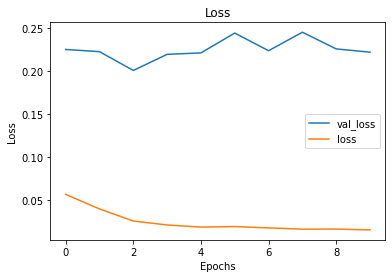

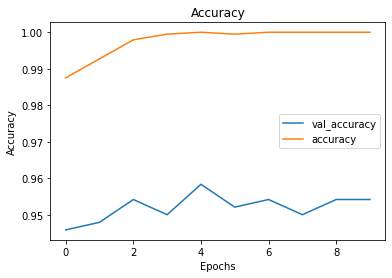

In [36]:
vi.visualize_training_results(results)

confusion matrix, without normalization


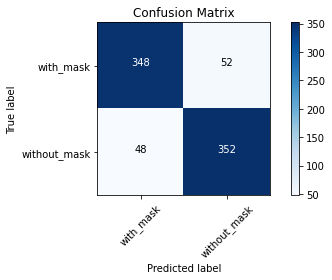

In [37]:
CATEGORIES = ['with_mask', 'without_mask']
vi.plot_confusion_matrix(cm=cm, classes=CATEGORIES, title='Confusion Matrix', normalize=False)

In [23]:
# # Import image to test

# import cv2
# from tensorflow.keras.models import load_model

# def prepare(filepath, img_size=IMG_SIZE):
#     img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
#     new_array = cv2.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    
# model = load_model("the-model.model")

# prediction = model.predict([prepare('image.jpg')])